![Alt text](局部截取_20250519_165457.png)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Geometrische Parameter
# Einheit: mm, K, N, g

ra = 25 # Radius von Außen
ri = 2 # Radius von Innen
eps = 0.03 # max. Dehnnung Epsilon 10% Bsp. Material NiTi
d = 1 # Dicke von SMA-Membran
l = (eps+1)*(ra-ri) # Länge von Seitenfläche
h = np.sqrt(l**2-(ra-ri)**2) # Tiefe
V_k = np.pi*h*(ra**3-ri**3)/(3*(ra-ri)) # Volumen von Kammer
V_m = np.pi*(ra**2-ri**2)*d # effective Volumen von SMA-Membran 
A_oben = np.pi*(ra**2-ri**2) # Fläche von Oberseite
A_seite = np.pi*(ra+ri)*l # Fläche von Seitenfläche

print("Tiefe h: "+str(h)+" mm")
print("Länge l: "+str(l)+" mm")
print("Volumen von Kammer V_k: "+str(V_k)+" mm^3")
print("Volumen von Membran V_m: "+str(V_m)+" mm^3")
print("Fläche von Oberseite A_oben: "+str(A_oben)+" mm^2")
print("Fläche von Seitenfläche A_seite: "+str(A_seite)+" mm^2")


Tiefe h: 5.675922832456419 mm
Länge l: 23.69 mm
Volumen von Kammer V_k: 4035.84868134094 mm^3
Volumen von Membran V_m: 1950.9290378792616 mm^3
Fläche von Oberseite A_oben: 1950.9290378792616 mm^2
Fläche von Seitenfläche A_seite: 2009.4569090156394 mm^2


In [33]:
# Materialparameter
# Mechanische Parameter
# Einheit: N/mm^2, g/mm^3, g

di_Wasser = 0.001 # Dichte Wasser (g/mm^3)
di_Membran = 0.00645 # Dichte von Membran (g/mm^3)
E_austenit = 8.3e10 # E-Modul von Austenit 83 GPa
E_martensit = E_austenit/3
m_Wasser = di_Wasser*V_k # Masse von Wasser (g)
m_Membran = di_Membran*V_m # Masse von Membran (g)
eps_0 = 0.095 # Transformationsdehnung von NiTi

print("Masse von Wasser m_Wasser: "+str(m_Wasser)+" g")
print("Masse von Membran m_Membran: "+str(m_Membran)+" g")


Masse von Wasser m_Wasser: 4.03584868134094 g
Masse von Membran m_Membran: 12.583492294321237 g


In [34]:
# Mechanisches Modell
# bei eingesanntem Rand
# max. angeförderte Druck p_max
p_max = 1e-6*(h*E_austenit*d**3)/(0.682*((ri*ra)**2)*(1-((ri/ra)**2)*(0.75-np.log(ri/ra)))) #MPa
#max. angeföderter Kraft F_max
F_max = p_max*np.pi*ra**2
#max. Spannung in der Mitte:
Tension_max = 1.95*((ri/ra)**2)*(0.25*(ri/ra)**2-np.log(ri/ra))*(p_max*ra**2)/d**2 #MPa

print("max. angeförderter Druck p_max: "+str(p_max)+" MPa")
print("max. angeförderte Kraft: "+str(F_max)+" N")
print("max. Spannung in der Mitte: "+str(Tension_max)+" MPa")



max. angeförderter Druck p_max: 282.22262315287315 MPa
max. angeförderte Kraft: 554142.8247336919 N
max. Spannung in der Mitte: 5563.50069261535 MPa


In [35]:
# Termodynamische Parameter
# Einheit: K, N/mm^2, J/gK, J

CC_slop = 7.44 # Clausius-Clapeyron-Slope MPa/K
c_m = 0.59 # spezifische Wärme von NiTi (J/gK)
c_w = 4.186 # spezifische Wärme von Wasser (J/gK)
A_f = 0 #Austenit-Finish-Temperatur °C
A_s = -15 # Austenit-Start-Temperatur °C
M_f = -75 # Martensit-Finish-Temperatur °C
M_s = -55 # Martensit-Start-Temperatur °C
T_e = 0.5*(M_s+A_s)+273.15 # thermodynamische equilibrium Temperatur (K)
delta_H = -10.83 # Enthalpieänderung von NiTi
#delta_S = -CC_slop*eps_0 # Entropieänderung  
delta_S = delta_H/T_e # Alternative Berechnung (J/gK)
T = 302.15 # Umgebungstemperatur (K) 30°C
delta_T_m = -T*delta_S/c_m # adiabatische Temperaturänderung von Membran 

print("Entropieänderung von NiTi delta_S: "+str(delta_S)+" J/gK")
print("adiabatische Temperaturänderung von Membran delta_T_m: "+str(delta_T_m)+" K")

Entropieänderung von NiTi delta_S: -0.045475540625656105 J/gK
adiabatische Temperaturänderung von Membran delta_T_m: 23.288872203461004 K


In [36]:
#-------------------------------------------------------------------------------
# thermodynamisches Modell
#-------------------------------------------------------------------------------
# 1. Fall: Wasser und Membran sind in thermodynamischen Gleichgewicht und haben die gleiche Temperatur von Umgebung

T_m0 = T - delta_T_m # Anfangstemperatur von Membran
T_eq = T # Endtemperatur von Membran und Wasser
# positive Wärmeänderung von Membran
Cp_m = m_Membran*c_m # Wärmekapazität von Membran ~V_m (J/gK)
Cp_w = m_Wasser*c_w # Wärmekapazität von Wasser ~V_k (J/gK)
Qc = Cp_m/Cp_w # Verhaltnis von Wärmekapazität von Membran und Wasser
T_w0 = (Qc+1)*T_eq-Qc*T_m0 # erforderte Anfangstemperatur von Wasser

print("Verhaltnis von Wärmekapazität von Membran und Wasser Qc: "+str(Qc))
print("Anfangstemperatur von Membran T_m0: "+str(T_m0-273.15)+" °C")
print("Endtemperatur von Membran T_eq: "+str(T_eq-273.15)+" °C")
print("erfoderte Anfangstemperatur von Wasser T_w0: "+str(T_w0-273.15)+" °C")

Verhaltnis von Wärmekapazität von Membran und Wasser Qc: 0.43945974619496075
Anfangstemperatur von Membran T_m0: 5.711127796539017 °C
Endtemperatur von Membran T_eq: 29.0 °C
erfoderte Anfangstemperatur von Wasser T_w0: 39.23452186769987 °C


In [37]:
# Temperaturverlauf in der Zeit
h_t = 300 # Wärmeleitungskoeffizient bei der freien Konvektion (W/m^2K)
tau_oben = 1/(h_t*A_oben*1e-6*(1/Cp_m+1/Cp_w)) # Zeitkonstante von Oberseite
tau_seite = 1/(h_t*A_seite*1e-6 *(1/Cp_m+1/Cp_w)) # Zeitkonstante von Seitenfläche
print("Zeitkonstante von Oberseite tau_oben: "+str(tau_oben)+" s")
print("Zeitkonstante von Seitenfläche tau_seite: "+str(tau_seite)+" s")

Zeitkonstante von Oberseite tau_oben: 8.812333956216058 s
Zeitkonstante von Seitenfläche tau_seite: 8.555664035161222 s


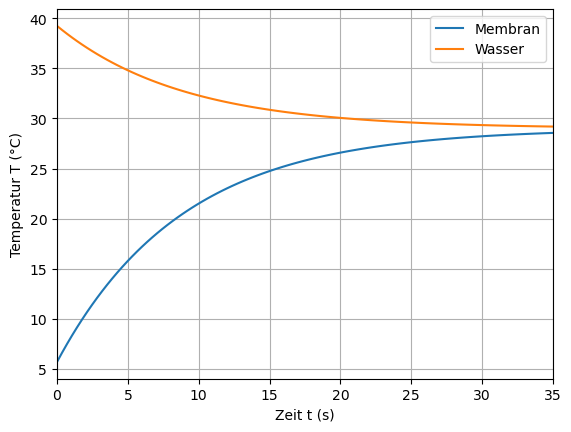

In [38]:
t_end = int(4*tau_oben) # Endzeit in s
t = np.linspace(0, t_end, 100) # Zeit in s
d_T_oben = (T_m0-T_w0)*np.exp(-t/tau_oben) # Temperaturunterschied am Anfang
T_m=T_eq+1/(Qc+1)*d_T_oben # Temperaturverlauf von Membran
T_w=T_eq-Qc/(Qc+1)*d_T_oben # Temperaturverlauf von Wasser
f,ax1 = plt.subplots()
ax1.plot(t, T_m-273.15, label='Membran')
ax1.plot(t, T_w-273.15, label='Wasser')
ax1.legend()
ax1.set_xlabel('Zeit t (s)')
ax1.set_ylabel('Temperatur T (°C)')
ax1.set_xlim(0, t_end)
ax1.grid()
plt.show()



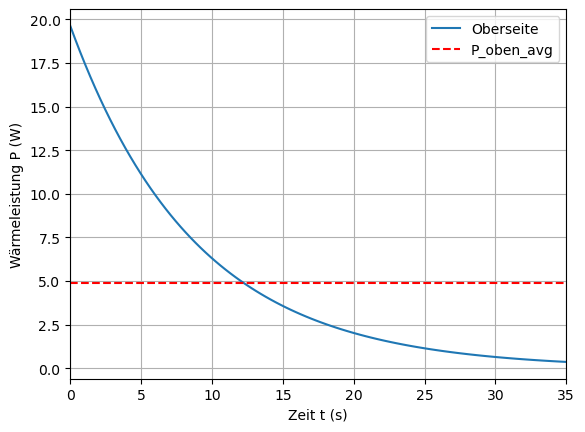

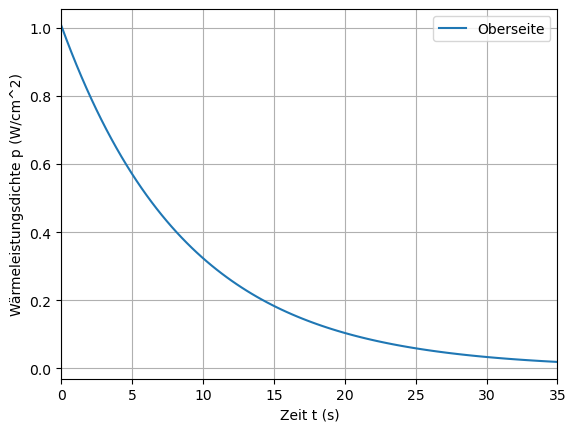

In [39]:
# Wärmeleistung
P_oben = h_t*A_oben*1e-6*np.abs(d_T_oben) # Wärmeleistung von Oberseite (W)
P_oben_avg = np.mean(P_oben) # mittlere Wärmeleistung von Oberseite (W)
f,ax1 = plt.subplots()
ax1.plot(t, P_oben, label='Oberseite')
ax1.axhline(y=P_oben_avg, color='r', linestyle='--', label='P_oben_avg')
ax1.legend()
ax1.set_xlabel('Zeit t (s)')
ax1.set_ylabel('Wärmeleistung P (W)')
ax1.set_xlim(0, t_end)
ax1.grid()

p_oben = h_t*np.abs(d_T_oben)*1e-4 # Wärmeleistungsdichte von Oberseite (W/cm^2)
f,ax2 = plt.subplots()
ax2.plot(t, p_oben, label='Oberseite')
ax2.legend()
ax2.set_xlabel('Zeit t (s)')
ax2.set_ylabel('Wärmeleistungsdichte p (W/cm^2)')
ax2.set_xlim(0, t_end)
ax2.grid()
plt.show()



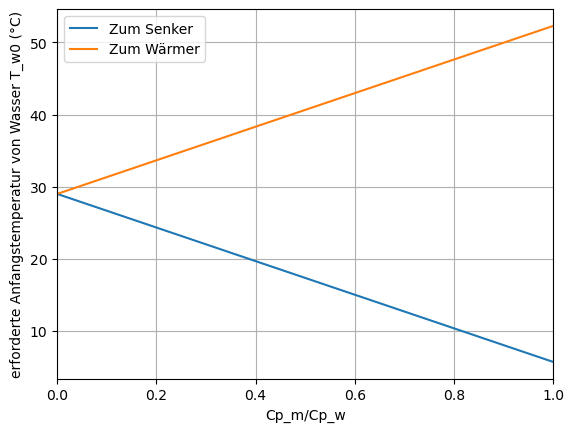

In [40]:
# Zusammenhang zwischen erforderte Anfangstemperatur von Wasser und Verhaltnis von Wärmekapazität
# Cp_m/Cp_w ~ V_m/V_k
Qc = np.linspace(0, 1, 100) # Verhaltnis von Wärmekapazität von Membran und Wasser
T_m0 = T + delta_T_m # Anfangstemperatur von Membran
T_eq = T # Endtemperatur von Membran und Wasser
T_w0 = (Qc+1)*T_eq-Qc*T_m0 # erforderte Anfangstemperatur von Wasser
f,ax1 = plt.subplots()
ax1.plot(Qc, T_w0-273.15, label='Zum Senker')

T_m0 = T - delta_T_m # Anfangstemperatur von Membran
T_w0 = (Qc+1)*T_eq-Qc*T_m0 # erforderte Anfangstemperatur von Wasser
ax1.plot(Qc, T_w0-273.15,label='Zum Wärmer')
ax1.legend()
ax1.set_xlabel('Cp_m/Cp_w')
ax1.set_ylabel('erforderte Anfangstemperatur von Wasser T_w0 (°C)')
ax1.set_xlim(0, 1)
ax1.grid()
plt.show()


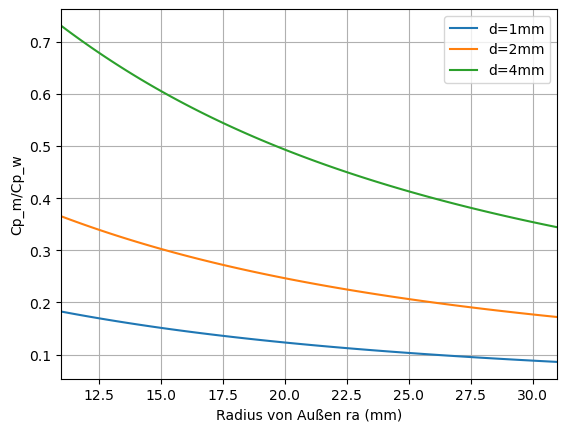

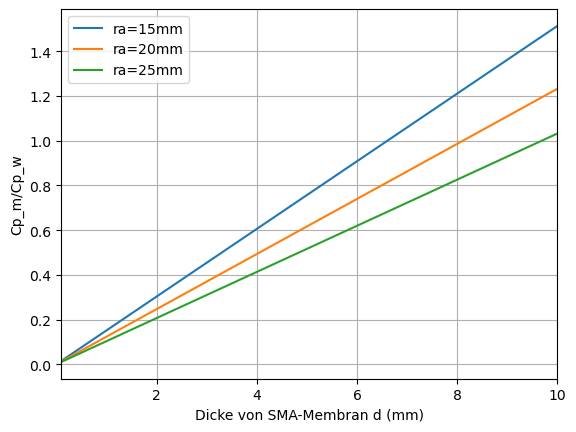

In [41]:
# Zusammenhang zwischen Verhaltnis von Wärmekapazität und Geometrie
ra = np.linspace(11,31,100) # Radius von Außen
ri = 10 # Radius von Innen
eps = 0.1 # max. Dehnnung Epsilon 10% Bsp. Material NiTi
d = [1,2,4] # Dicke von SMA-Membran
l = (eps+1)*(ra-ri) # Länge von Seitenfläche
h = np.sqrt(l**2-(ra-ri)**2) # Tiefe
V_k = np.pi*h*(ra**3-ri**3)/(3*(ra-ri)) # Volumen von Kammer
Qc = (V_m*m_Membran*c_m)/(V_k*m_Wasser*c_w) # Verhaltnis von Wärmekapazität von Membran und Wasser
f,ax1 = plt.subplots()
for i in range(len(d)):
    d_i = d[i]
    V_m = np.pi*(ra**2-ri**2)*d_i # effective Volumen von SMA-Membran 
    Qc = (V_m*m_Membran*c_m)/(V_k*m_Wasser*c_w) # Verhaltnis von Wärmekapazität von Membran und Wasser
    ax1.plot(ra, Qc, label='d='+str(d_i)+'mm')
ax1.legend()
ax1.set_xlabel('Radius von Außen ra (mm)')
ax1.set_ylabel('Cp_m/Cp_w')
ax1.set_xlim(11, 31)
ax1.grid()

ra = [15,20,25] # Radius von Außen
d = np.linspace(0.1,10,100) # Dicke von SMA-Membran
ri = 10 # Radius von Innen
eps = 0.1 # max. Dehnnung Epsilon 10% Bsp. Material NiTi
f,ax2 = plt.subplots()
for i in range(len(ra)):
    l = (eps+1)*(ra[i]-ri) # Länge von Seitenfläche
    h = np.sqrt(l**2-(ra[i]-ri)**2) # Tiefe
    V_k = np.pi*h*(ra[i]**3-ri**3)/(3*(ra[i]-ri)) # Volumen von Kammer
    V_m = np.pi*(ra[i]**2-ri**2)*d # effective Volumen von SMA-Membran
    Qc = (V_m*m_Membran*c_m)/(V_k*m_Wasser*c_w) # Verhaltnis von Wärmekapazität von Membran und Wasser
    ax2.plot(d, Qc, label='ra='+str(ra[i])+'mm')
ax2.legend()
ax2.set_xlabel('Dicke von SMA-Membran d (mm)')
ax2.set_ylabel('Cp_m/Cp_w')
ax2.set_xlim(0.1, 10)
ax2.grid()
plt.show()

